# PDF and CDF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
x = np.linspace(-6, 6, 1000)

In [4]:
fx = norm.pdf(x, loc=0, scale=1)

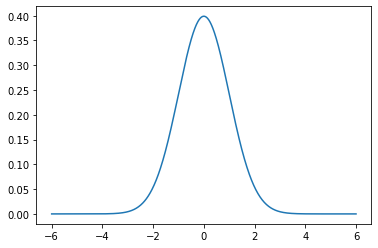

In [5]:
plt.plot(x, fx);

In [6]:
FX = norm.cdf(x, loc=0, scale=1)

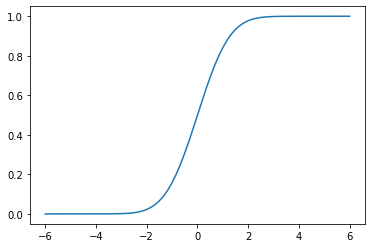

In [7]:
plt.plot(x, FX);

In [8]:
logfx = norm.logpdf(x, loc=0, scale=1)

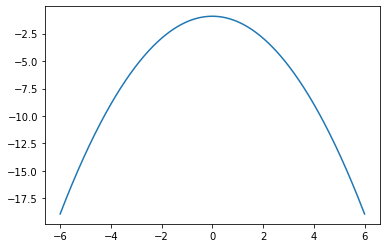

In [9]:
plt.plot(x, logfx);

# Convolution

In [10]:
from PIL import Image

In [11]:
!wget https://www.musicmundial.com/wp-content/uploads/2020/06/5-canciones-que-debes-escuchar-de-AURORA-Aksnes-en-su-cumplea%C3%B1os.jpg

--2021-01-07 12:58:14--  https://www.musicmundial.com/wp-content/uploads/2020/06/5-canciones-que-debes-escuchar-de-AURORA-Aksnes-en-su-cumplea%C3%B1os.jpg
Resolving www.musicmundial.com (www.musicmundial.com)... 2606:4700:3034::6818:78fb, 2606:4700:3033::ac43:9e54, 2606:4700:3037::6818:79fb, ...
Connecting to www.musicmundial.com (www.musicmundial.com)|2606:4700:3034::6818:78fb|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56590 (55K) [image/jpeg]
Saving to: ‘5-canciones-que-debes-escuchar-de-AURORA-Aksnes-en-su-cumpleaños.jpg’

5-canciones-que-deb 100%[===================>]  55.26K  --.-KB/s    in 0.06s   

2021-01-07 12:58:16 (957 KB/s) - ‘5-canciones-que-debes-escuchar-de-AURORA-Aksnes-en-su-cumpleaños.jpg’ saved [56590/56590]



In [12]:
im = Image.open('aurora.jpg')

In [13]:
gray = np.mean(im, axis=2)

In [14]:
x = np.linspace(-6, 6, 50)

In [15]:
fx = norm.pdf(x, loc=0, scale=1)

In [16]:
filt = np.outer(fx, fx)

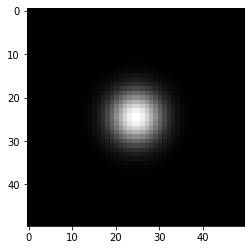

In [17]:
plt.imshow(filt, cmap='gray')

In [18]:
from scipy.signal import convolve2d

In [19]:
out = convolve2d(gray, filt)

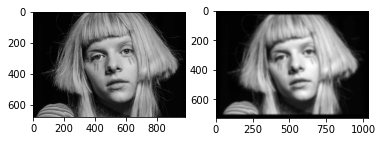

In [20]:
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray');

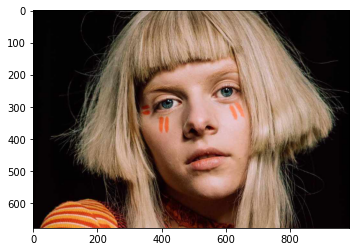

In [21]:
plt.imshow(im);

# Scipy Exercise

In [55]:
!wget https://5.imimg.com/data5/AN/GA/MY-46595757/lemon-leaf-281-kg-29-500x500.png

--2021-01-07 15:19:16--  https://5.imimg.com/data5/AN/GA/MY-46595757/lemon-leaf-281-kg-29-500x500.png
Resolving 5.imimg.com (5.imimg.com)... 2600:9000:201f:ee00:1d:c532:3180:93a1, 2600:9000:201f:aa00:1d:c532:3180:93a1, 2600:9000:201f:3000:1d:c532:3180:93a1, ...
Connecting to 5.imimg.com (5.imimg.com)|2600:9000:201f:ee00:1d:c532:3180:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509634 (498K) [image/png]
Saving to: ‘lemon-leaf-281-kg-29-500x500.png’

lemon-leaf-281-kg-2 100%[===================>] 497.69K   315KB/s    in 1.6s    

2021-01-07 15:19:20 (315 KB/s) - ‘lemon-leaf-281-kg-29-500x500.png’ saved [509634/509634]



In [56]:
lemonim = Image.open('lemon-leaf-281-kg-29-500x500.png')

In [57]:
lemongray = np.mean(lemonim, axis=2)

In [48]:
Hx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
Hy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

In [58]:
Gx = convolve2d(lemongray, Hx)
Gy = convolve2d(lemongray, Hy)

In [59]:
type(Gx)
Gx.shape

(473, 502)

In [60]:
type(Gy)
Gy.shape

(473, 502)

In [61]:
productGx = Gx ** 2
productGy = Gy ** 2

In [62]:
G = np.sqrt(productGx + productGy)

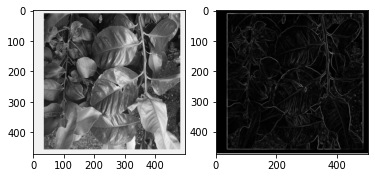

In [64]:
plt.subplot(1,2,1)
plt.imshow(lemongray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(G, cmap='gray');